# kMeans

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1337)

import pickle
data, labels = pickle.load(open("digits.pickle", "rb"))

In [16]:
from sklearn import cluster
clust = cluster.KMeans(n_clusters=10) 
clust.fit(data)
centroids = clust.cluster_centers_

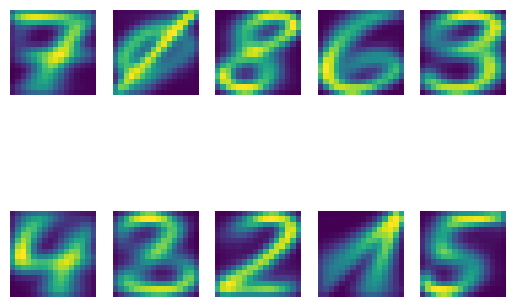

In [27]:
fig, axes = plt.subplots(2,5)
axes = axes.flatten()
for i, axe in enumerate(axes):
    point = centroids[i]
    axe.imshow(point.reshape(16,16))
    axe.axis("off")

# DBSCAN

||DBSCAN|kMeans|
|-|-----|------|
|deterministic|not really (see border points)|no|
|grouping|density|centroid|
|parameters| $ \epsilon$, $n_{min}$ | k |
|iterations|1|?|
|noise| yes| no|

In [98]:
import numpy as np
from sklearn import datasets, neighbors
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1337)
epsilon = .15
nmin = 4

data = datasets.make_circles(n_samples=500, noise=0.1, factor=.4)[0]

In [72]:
neigh = neighbors.NearestNeighbors(n_neighbors=4)
neigh.fit(data)
neigh.kneighbors()[0]
distances = [sum(item) for item in neigh.kneighbors()[0]]

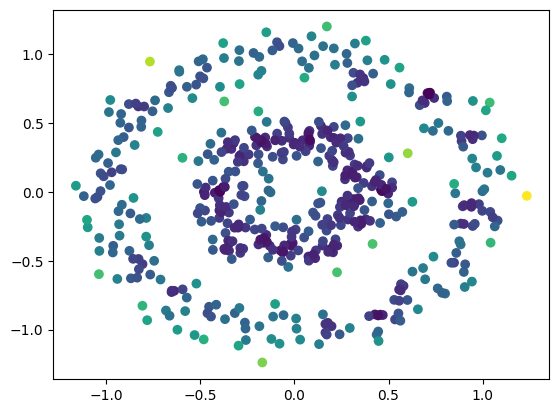

In [94]:
norm = plt.Normalize(min(distances), max(distances))
plt.scatter(data[:,0], data[:,1], c=cm.viridis(norm(distances)))

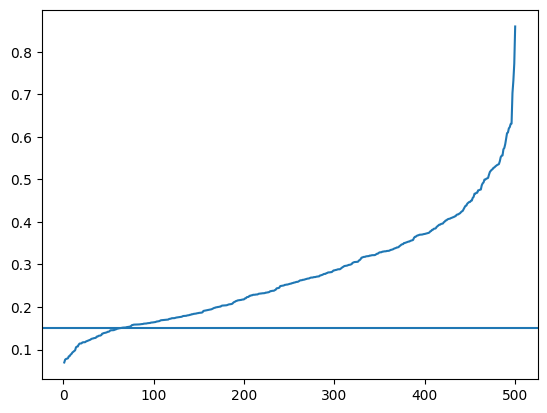

In [99]:
distances_sorted = np.sort(distances)
plt.plot(np.arange(1, len(distances_sorted)+1), distances_sorted )
plt.axhline(epsilon)

In [100]:
clustering = cluster.DBSCAN(eps=epsilon, min_samples=nmin).fit(data)

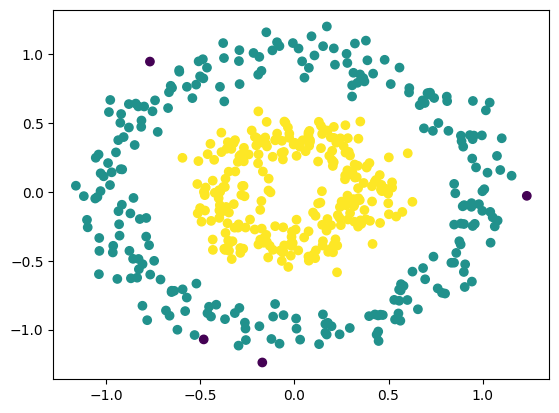

In [109]:
plt.scatter(data[:,0], data[:,1], c=clustering.labels_)